In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('lena.bmp')

Copy img to binary

In [3]:
import numpy as np
binary = img.copy()

In [4]:
binary.shape

(512, 512, 3)

In [7]:
for i in range(binary.shape[0]):
    for j in range(binary.shape[1]):
        for h in range(binary.shape[2]):
            if binary[i][j][h]>=128:
                binary[i][j][h]=255
            else:
                binary[i][j][h]=0

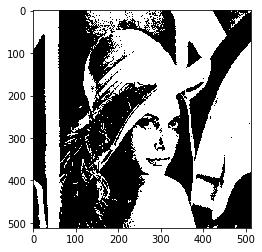

In [8]:
%matplotlib inline
plt.imshow(binary)

In [9]:
histogram = img.copy()

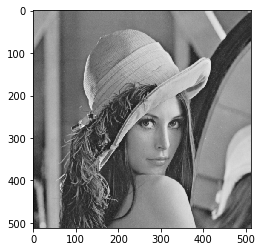

In [10]:
plt.imshow(histogram)

In [11]:
hist = [0] * 256

In [12]:
for i in range(histogram.shape[0]):
    for j in range(histogram.shape[1]):
        for h in range(histogram.shape[2]):
            hist[histogram[i][j][h]] += 1

In [13]:
hist=np.array(hist)

In [14]:
hist.reshape(256,1)

array([[   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   3],
       [  21],
       [  57],
       [  87],
       [ 177],
       [ 291],
       [ 411],
       [ 546],
       [ 663],
       [ 897],
       [1266],
       [1497],
       [1842],
       [2274],
       [2832],
       [3180],
       [3765],
       [4323],
       [4944],
       [5280],
       [5652],
       [5994],
       [6270],
       [6069],
       [6303],
       [6264],
       [6090],
       [5934],
       [5424],
       [5190],
       [5004],
       [4731],
       [4407],
       [3834],
       [3708],
       [3660],
       [3009],
       [2790],
       [2925],
       [2640],
       [2679],
       [23

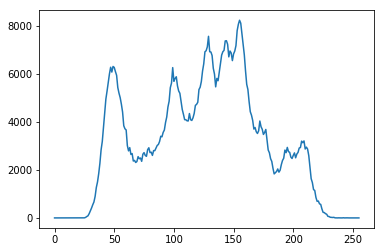

In [15]:
plt.plot(hist)

In [16]:
cp = cv2.imread('lena.bmp', 0)

In [17]:
cp = cv2.threshold(cp, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary

In [18]:
ret, labels = cv2.connectedComponents(cp,connectivity=8)

In [19]:
labels.shape

(512, 512)

Implement Connected Components
Use Run-Length Based Connected Component Algorithm

In [20]:
conn_comp = binary.copy()  #connected compoenent is copied from black and white image

In [21]:
conn_comp.shape

(512, 512, 3)

In [22]:
conn_comp.shape[1]

512

In [23]:
#pixel to run
s=[]
e=[]
r=[]
ID=[]
EQ=[]

run=0
isblock=0
for x in range(conn_comp.shape[0]):
    for y in range(conn_comp.shape[1]):
        if conn_comp[x,y,1]==255 and isblock==0 and y!=511:
            s.append(y)
            isblock=1
        elif isblock==1 and (conn_comp[x,y,1]==0 or y==511):
            e.append(y-1)
            r.append(x)
            ID.append(0)
            EQ.append(0)
            run+=1
            isblock=0

print(run)

7150


In [24]:
#initialize labeling & propagation of labels

# 1. excluding runs on the last row => find the runs need to be excluded
ex_row=[]
for row in range(len(r)):
    if r[row]==511:
        ex_row.append(row)

In [25]:
ex_row

[7135,
 7136,
 7137,
 7138,
 7139,
 7140,
 7141,
 7142,
 7143,
 7144,
 7145,
 7146,
 7147,
 7148,
 7149]

In [26]:
m=1
# 1. excluding runs on the last row
for i in range(ex_row[0]):
    if ID[i]==0:
        ID[i]=m
        EQ[i]=m
        m+=1
    gen=(j for j in range(len(r)) if r[j]==r[i]+1)  #for each rj ∈ ri+1
    for j in gen:
        if ID[j]==0 and e[i]+1>=s[j] and s[i]+1<=e[j]:   # 8-adjacency
            ID[j]=ID[i]
            EQ[j]=ID[i]
        if ID[j]!=0 and e[i]+1>=s[j] and s[i]+1<=e[j]:   # 8-adjacency
            EQ[i]=ID[j]

In [27]:
#resolve conflict
for i in range(run):
    if ID[i]!=EQ[i]:
        TID=ID[i]
        TEQ=EQ[i]
        for j in range(run):
            if ID[j]==TID:
                ID[j]=TEQ
            if EQ[j]==TID:
                EQ[j]=TEQ

In [94]:
len(ID)

7145

In [43]:
# create 5 dictionaries to store :
# 1) the total number of pixels
# 2) minimum row
# 3) maximum row
# 4) minimum col
# 5) maximum col

cnt_pix={}
min_r={}
max_r={}
min_c={}
max_c={}

for i in range(len(ID)):
    cnt=e[i]-s[i]+1
    key=ID[i]
    if key in cnt_pix:
        cnt_pix[key] += cnt
        if min_r[key]>r[i]:
            min_r[key]=r[i]
        if max_r[key]<r[i]:
            max_r[key]=r[i]
        if min_c[key]>s[i]:
            min_c[key]=s[i]
        if max_c[key]<e[i]:
            max_c[key]=e[i]
    else:
        cnt_pix[key]=cnt
        min_r[key]=r[i]
        max_r[key]=r[i]
        min_c[key]=s[i]
        max_c[key]=e[i]

In [44]:
cnt_pix

{1375: 18290,
 2: 10,
 1678: 103986,
 5: 1,
 10: 1,
 98: 249,
 12: 25,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 41,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 1,
 70: 2,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 2,
 76: 1,
 77: 1,
 78: 1,
 79: 2,
 80: 1,
 81: 1,
 82: 3,
 83: 2,
 84: 1,
 85: 1,
 86: 4,
 316: 288,
 88: 4,
 89: 1,
 90: 3,
 91: 1,
 92: 1,
 93: 2,
 94: 1,
 96: 6,
 97: 1,
 99: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 2,
 112: 9,
 114: 1,
 115: 3,
 116: 2,
 117: 3,
 118: 1,
 119: 1,
 120: 2,
 121: 1,
 122: 1,
 125: 1,
 126: 4,
 127: 1,
 128: 1,
 131: 1,
 133: 3,
 134: 1,
 136: 1,
 137: 1,
 142: 1,
 145: 2,
 147: 5,
 149: 1,
 150: 1,
 152: 1

In [65]:
res_index=[]
for key,value in cnt_pix.items():
    if value>=500:
        res_index.append(key)
        print(value)


18290
103986
1984
634
777
1490


In [46]:
res_index

[1375, 1678, 669, 1035, 1504, 1438]

In [51]:
#get the row and col of each index
min_rlist=[]
max_rlist=[]
min_clist=[]
max_clist=[]

for i, element in enumerate(res_index):
    min_rlist.append(min_r[element])    
    max_rlist.append(max_r[element])
    min_clist.append(min_c[element])    
    max_clist.append(max_c[element])


In [56]:
min_rlist

[0, 0, 104, 240, 374, 399]

In [62]:
conn_comp=binary.copy()

In [63]:
# Plot bounding box, use cv2.Rectangle
for i in range(len(min_rlist)):
    conn_comp=cv2.rectangle(conn_comp,(min_clist[i],min_rlist[i]),(max_clist[i],max_rlist[i]),(0,255,0),3)

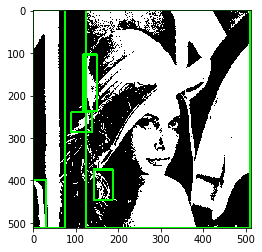

In [64]:
plt.imshow(conn_comp)